# ADS Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

-- Input some description here --

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


## 2) Exploratory Data Analysis

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


In [8]:
df_data.describe()

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
count,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.00000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,9.213726e+07,2.152700e+07,3.573513e+05,1381.216629,103992.366783,0.468355,3.479465e+20,2.968093e+10,5666.337333,11803.14200,15.364400,23750.603146,5.864147e+06,1.993741e+10,617.044667,4125.926667,204.687733
std,1.072118e+07,2.498827e+07,3.256708e+05,1298.972394,102427.282277,0.372758,4.951416e+20,4.294052e+10,720.416553,9993.41593,2.797517,6437.954850,2.149345e+06,1.830498e+10,370.151816,3947.399550,250.083641
min,7.204931e+07,9.205000e+03,0.000000e+00,0.121000,11.529700,0.000000,0.000000e+00,0.000000e+00,2829.000000,575.00000,4.460000,12869.625000,0.000000e+00,0.000000e+00,126.000000,211.400000,0.000000
25%,8.278264e+07,5.229082e+05,4.175475e+04,59.658250,4471.975825,0.056725,3.404057e+19,1.497751e+10,5234.250000,1523.00000,13.950000,20230.968750,4.009369e+06,1.351073e+09,376.000000,610.250000,10.950000
50%,9.407962e+07,5.975766e+06,3.061815e+05,1444.464500,92156.117400,0.569950,2.910479e+20,2.251696e+10,5946.000000,13026.50000,14.340000,21226.718750,6.715085e+06,1.554304e+10,462.500000,3418.500000,136.045000
75%,1.016003e+08,4.406175e+07,6.285058e+05,2505.067250,179726.672575,0.831900,4.513010e+20,2.688101e+10,6080.000000,20983.25000,16.370000,30987.929688,7.997891e+06,3.956602e+10,774.000000,6721.075000,295.085000
max,1.076359e+08,7.469110e+07,1.349890e+06,3606.036000,295911.997400,0.969000,5.862526e+21,9.395883e+11,6912.000000,36630.00000,30.310000,39316.093750,8.004217e+06,4.936428e+10,2096.000000,19345.500000,1385.020000


In [9]:
# Correlations
df_corr = df_data.corr()
df_corr

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
Supply,1.000000,0.871879,0.843540,0.840346,0.823709,0.905329,0.474226,-0.337491,0.288837,0.870169,-0.187655,-0.792496,0.887071,0.902041,0.332875,0.733790,0.511601
AddressCount,0.871879,1.000000,0.789259,0.766725,0.782175,0.811562,0.380650,-0.233489,0.362446,0.804732,-0.288567,-0.857087,0.813752,0.891032,0.243759,0.651342,0.334379
TxGrowth,0.843540,0.789259,1.000000,0.851423,0.875319,0.936036,0.647129,-0.214922,0.245369,0.965090,-0.197697,-0.808046,0.888451,0.959463,0.634506,0.923400,0.797612
Difficulty,0.840346,0.766725,0.851423,1.000000,0.974904,0.928816,0.539480,-0.234873,0.041182,0.915648,0.019681,-0.788789,0.898953,0.904746,0.557167,0.751845,0.680616
NetworkHash,0.823709,0.782175,0.875319,0.974904,1.000000,0.902719,0.550765,-0.232651,0.214247,0.901368,-0.173559,-0.740443,0.885202,0.928528,0.654439,0.782741,0.702010
NetworkUtilization,0.905329,0.811562,0.936036,0.928816,0.902719,1.000000,0.627518,-0.236102,0.088811,0.975272,-0.017440,-0.859511,0.906912,0.961191,0.535564,0.845872,0.710283
TransactionFee,0.474226,0.380650,0.647129,0.539480,0.550765,0.627518,1.000000,0.076165,0.034146,0.634351,-0.034050,-0.442397,0.542742,0.603379,0.582100,0.645400,0.659227
AvgGasPrice,-0.337491,-0.233489,-0.214922,-0.234873,-0.232651,-0.236102,0.076165,1.000000,-0.193311,-0.220846,0.141051,0.152590,-0.283996,-0.238085,-0.074185,-0.179950,-0.109099
BlockCountReward,0.288837,0.362446,0.245369,0.041182,0.214247,0.088811,0.034146,-0.193311,1.000000,0.110668,-0.966166,0.038047,0.174196,0.292405,0.265952,0.238820,0.018776
BlockSize,0.870169,0.804732,0.965090,0.915648,0.901368,0.975272,0.634351,-0.220846,0.110668,1.000000,-0.046829,-0.854043,0.912690,0.961338,0.573232,0.879677,0.749189


### Data Visualization

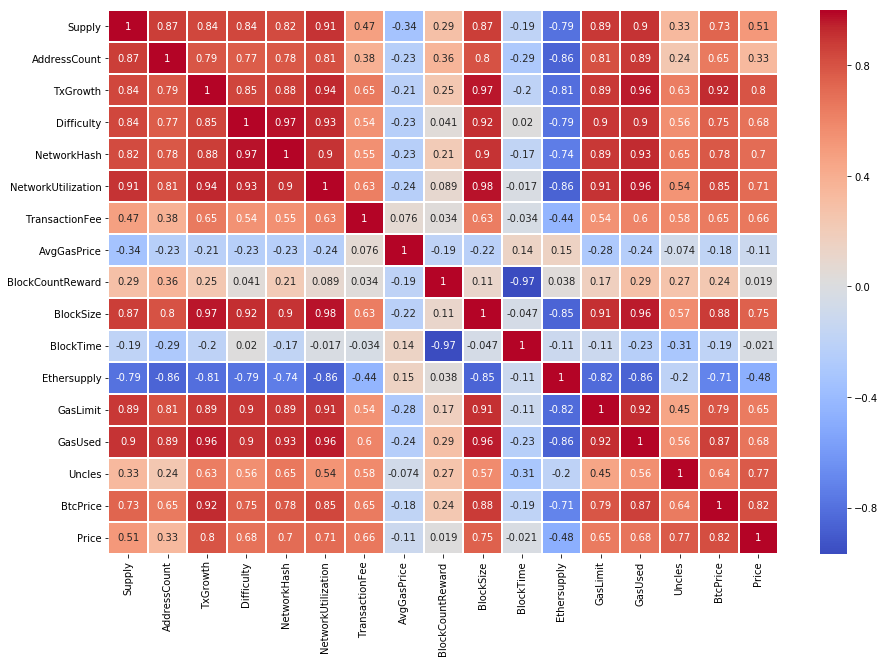

In [10]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

In [11]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values[:-1], 4)

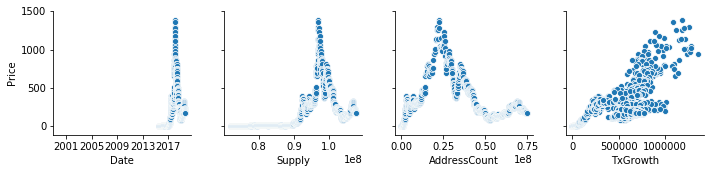

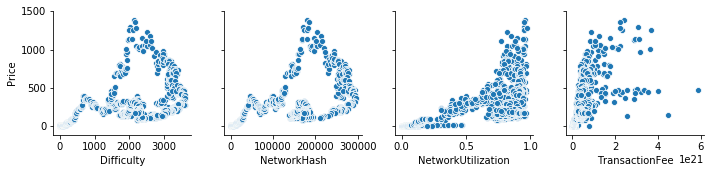

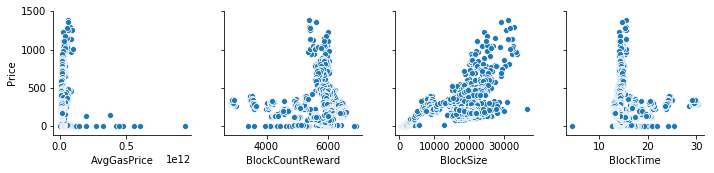

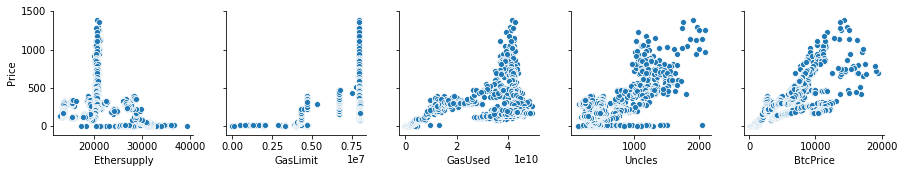

In [12]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

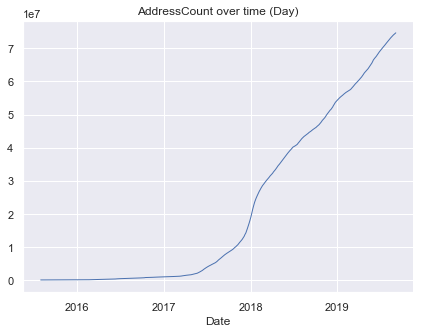

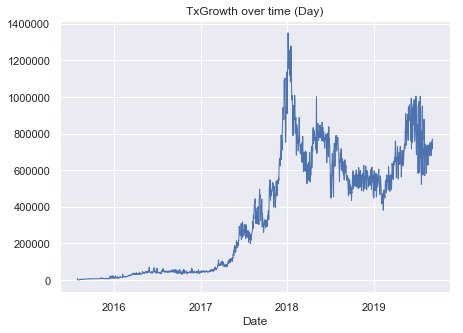

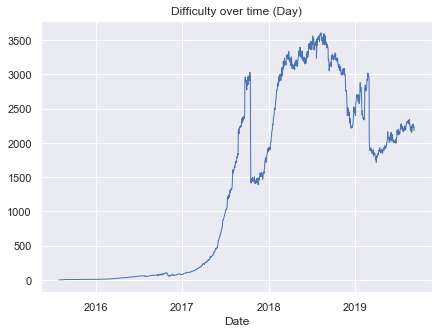

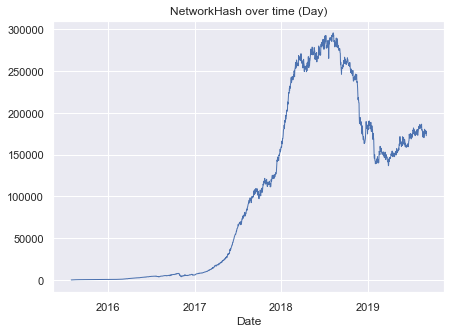

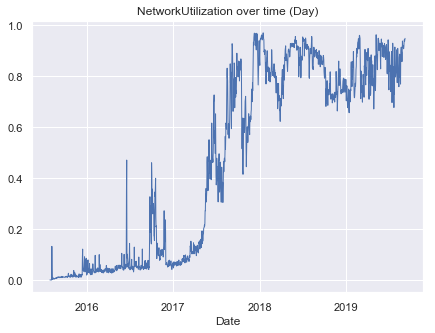

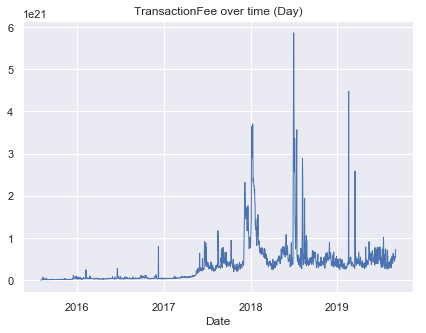

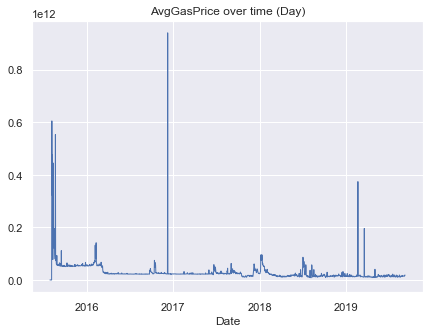

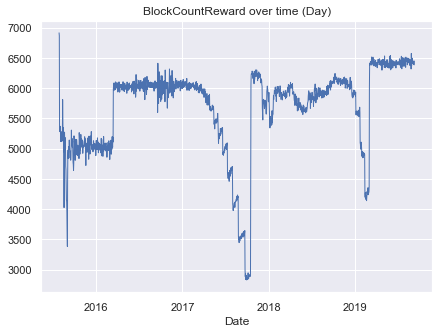

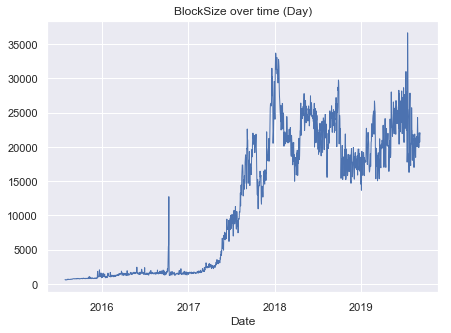

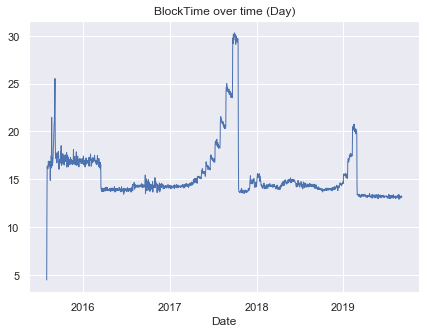

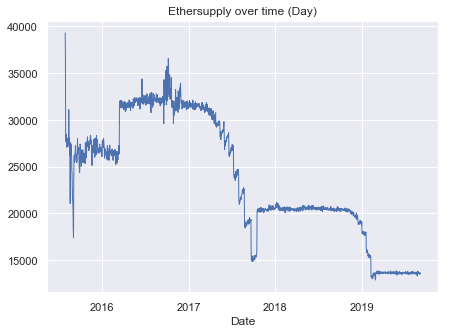

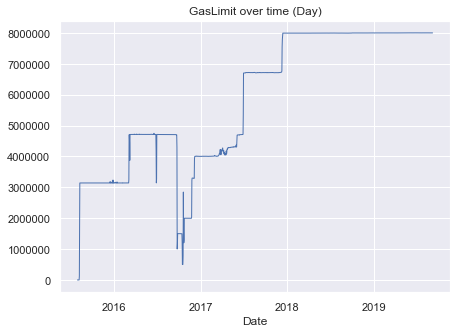

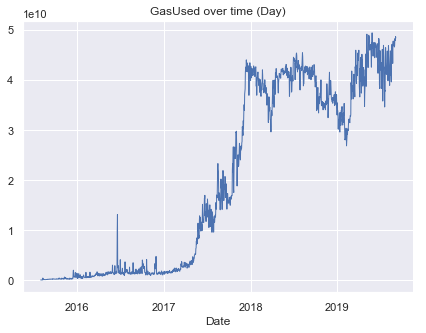

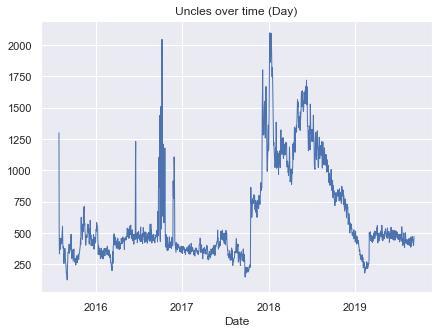

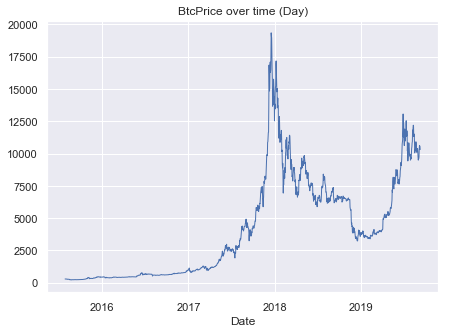

In [13]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(7, 5)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

### Seasonality Plot

Text(0.5,1,'Monthly Seasonality')

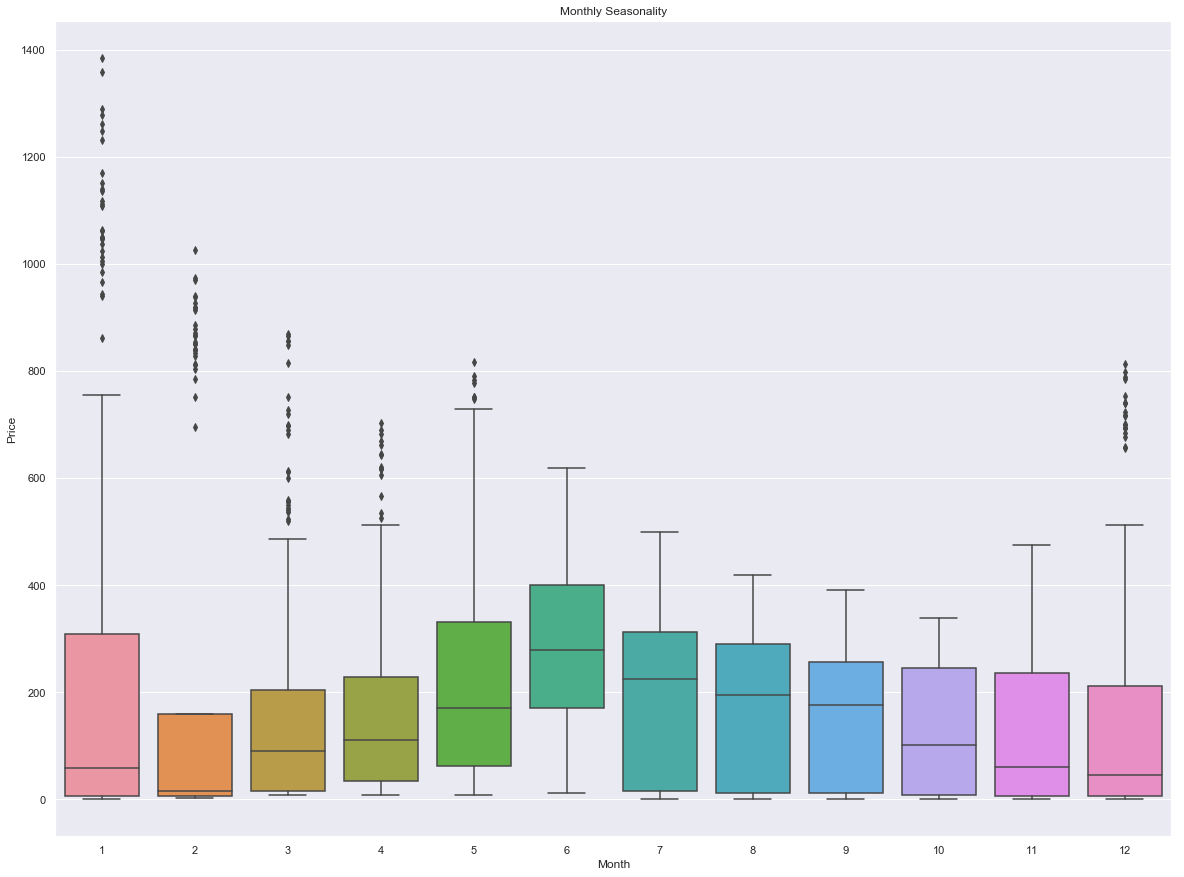

In [14]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Monthly Seasonality")

Text(0.5,1,'Weekly Seasonality')

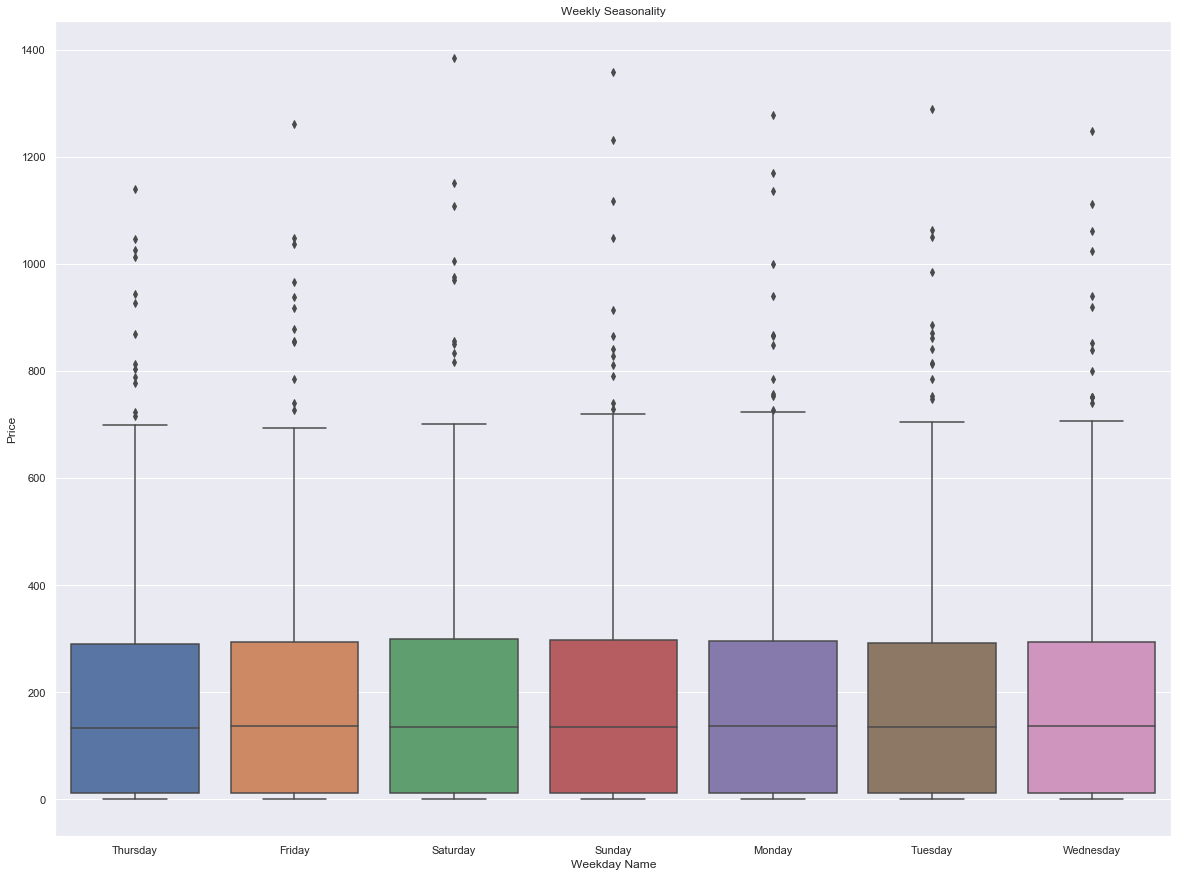

In [15]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Weekly Seasonality")

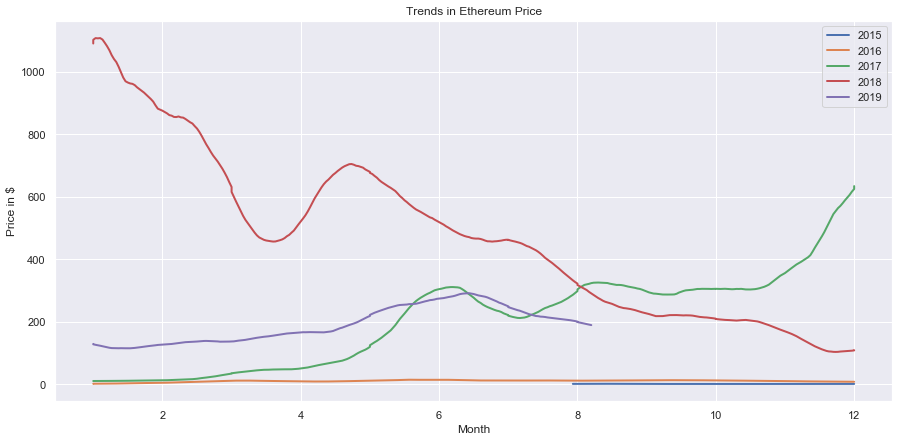

In [16]:
years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(30, center=True).mean()
    
fig, ax = plt.subplots(figsize=(15, 7))
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

From the plots below, we could see that there's no seasonality in Etherium Price. Neither by monthly nor weekly

### Trend Plot

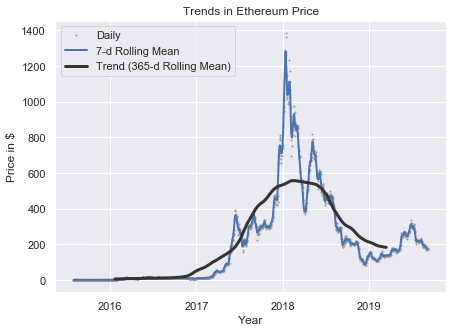

In [17]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price']

def plot_trend(column, data):
    df_time_365d = data[[column]].rolling(window=365, center=True, min_periods=360).mean()
    df_time_7d = data[[column]].rolling(7, center=True).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots()
    ax.plot(data[column], marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
    ax.plot(df_time_365d[column], color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    # Set x-ticks to yearly interval and add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in $')
    ax.set_title('Trends in Ethereum Price');

plot_trend("Price",df_time )

## 3) Feature Engineering

In [18]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object


In [19]:
#set Y variable
etherPrice = df_data[['Date','Price']].set_index('Date')


### Normalization

In [20]:
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features


### Feature for TS model

In [24]:

x_var = df_data.iloc[:,1:-1] 
normalised_TS_features = normalise_var(x_var)
#make into timeseries
normalised_TS_features["Date"] = df_data["Date"]
normalised_TS_features = normalised_TS_features.set_index('Date')


### Feature with suprevised learning

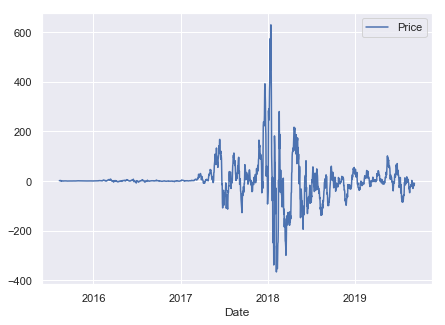

In [25]:
#Make Stationary
differenced = etherPrice.diff(12)
differenced = differenced[12:]
# Seasonality Adjusted
differenced.plot()
plt.show()

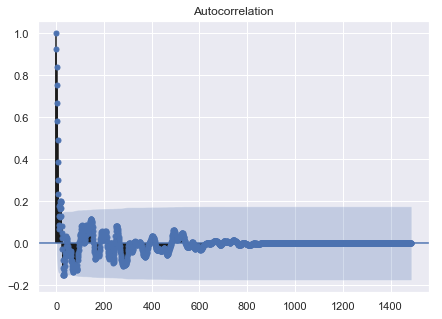

In [26]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
plt.show()

In [27]:
# reframe as supervised learning
lag_var = pd.DataFrame()
for i in range(12,0,-1):
    lag_var['t-'+str(i)] = differenced["Price"].shift(i).values
lag_var['t'] = differenced["Price"].values
display(lag_var.head(13))
lag_var = lag_var[13:]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37
6,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20
7,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27
8,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51
9,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51,0.67


In [28]:
normalise_Lag_features = normalise_var(lag_var)

In [29]:
normalise_Lag_features.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.369606,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340
1,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737
2,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707
3,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687
4,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687,0.368280


### Feature Importance plots and selection

1) Random Forest Regression. We can use feature importance to help to estimate the relative importance of contrived input features for time series forecasting.
2) A popular method for feature selection is called Recursive Feature Selection (RFE). RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left. Smaller is better

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

def plot_featimp(X,y):
    # fit random forest model
    model = RandomForestRegressor(n_estimators=500, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = X.columns.values
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names, rotation='vertical')
    plt.title("Feature Importance")
    plt.show()
    

def select_feature(X,y):
    rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
    fit = rfe.fit(X, y)
    # report selected features
    print('Selected Features:')
    names = X.columns.values
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, fit.ranking_)
    plt.xticks(ticks, names, rotation="vertical")
    plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.04764777 0.04812178 0.01529653 0.02647671 0.02928354 0.00541375
 0.00272383 0.00099691 0.00166554 0.00389165 0.00070278 0.00592179
 0.05668781 0.0105905  0.58459207 0.15998706]


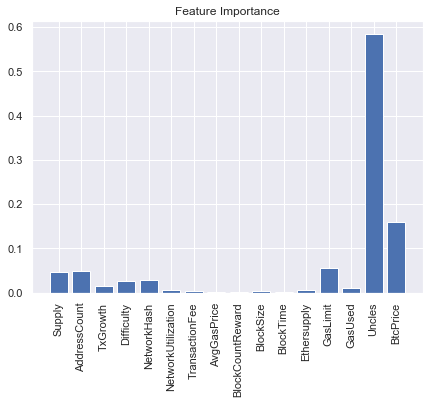

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features:
Supply
AddressCount
Uncles
BtcPrice


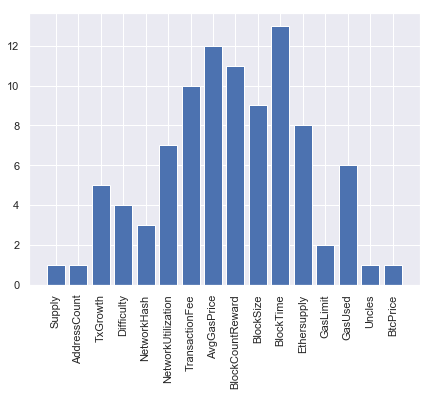

In [31]:
# with ts model
plot_featimp(normalised_TS_features,etherPrice)
select_feature(normalised_TS_features,etherPrice)

[0.01030228 0.01136461 0.00935514 0.00904723 0.0092302  0.01067421
 0.01025248 0.00759406 0.01003438 0.01490129 0.03940738 0.85783675]


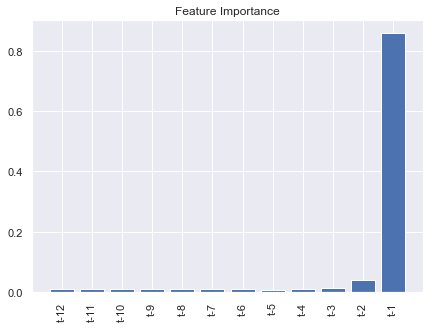

Selected Features:
t-11
t-7
t-2
t-1


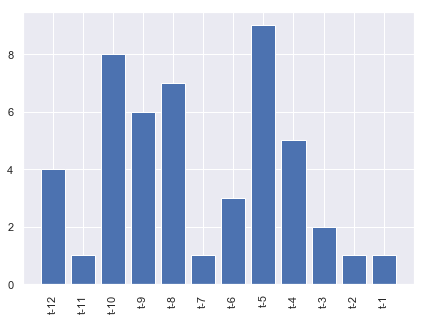

In [35]:
from sklearn.ensemble import RandomForestRegressor

X = normalise_Lag_features.iloc[:,0:-1]
y = normalise_Lag_features.iloc[:,-1]

# with supervised learning
plot_featimp(X,y)
select_feature(X,y)

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

### Data Split train and test

### Fit the model and predict

## 5) Evaluation
### Some evaluation methods

### Evaluation plots and data comparison

### Conclusion